In [18]:
# !/usr/bin/env python
# Importar bibliotecas
import numpy as np
import math
import csv
import copy
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils

In [19]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

Text(0.5, 1.0, 'Classe 5')

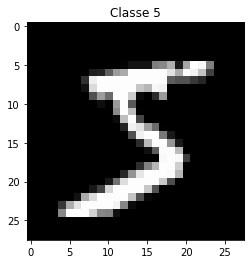

In [20]:
# Para visualizar a imagem
plt.imshow(X_train[0], cmap='gray')
# Visualizar a classe
plt.title('Classe ' + str(y_train[0]))

In [21]:
# Conversão de dados para tensorflow fazer a leitura das imagens do keras
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [22]:
# Setar o tipo de variável de uint8 para float32 para aumentar o tamanho
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [23]:
# Converte valor de 0 > 255 para 0 e 1
X_train /= 255
X_test /= 255

In [24]:
# Converte a saída de 1 classe (ex. 5) para 10 classes (ex. 0,0,0,0,1,0,0,0,0,0)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test,10)

In [42]:
# Criar o classificador
model = Sequential()

# 1 Layer
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='tanh', strides = 1))
model.add(AveragePooling2D())

# 2 Layer
model.add(Conv2D(filters = 16, activation='tanh', strides = 1, kernel_size = 5))
model.add(AveragePooling2D())

# 3 Etapa: Flattening
model.add(Flatten())
model.add(Dropout(0.2))

# 4ª Etapa: Gerar a rede neural densa
model.add(Dense(units = 120,activation='tanh'))
model.add(Dense(units = 84,activation='tanh'))
model.add(Dense(units = 10,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size =128, epochs=5, validation_data=(X_test, y_test))
resultado = classificador.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 53s 885us/step - loss: 0.3576 - accuracy: 0.8952 - val_loss: 0.1402 - val_accuracy: 0.9563
Epoch 2/5
60000/60000 [==============================] - 50s 833us/step - loss: 0.1461 - accuracy: 0.9552 - val_loss: 0.0910 - val_accuracy: 0.9722
Epoch 3/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1066 - accuracy: 0.9672 - val_loss: 0.0726 - val_accuracy: 0.9760
Epoch 4/5
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0858 - accuracy: 0.9736 - val_loss: 0.0609 - val_accuracy: 0.9801
Epoch 5/5
10000/10000 [==============================] - 2s 231us/step


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


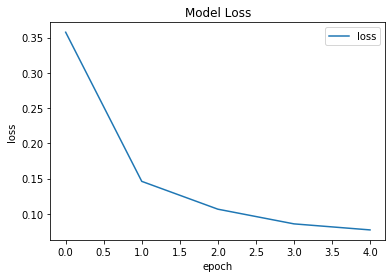

In [53]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


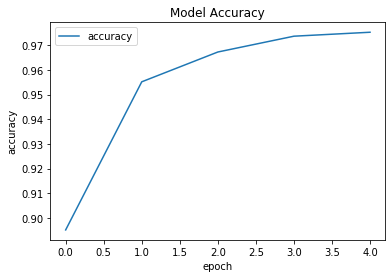

In [51]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()